In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix ,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")


# Data gathering

In [2]:
df=pd.read_csv(r"C:\Users\sanskriti\S.python\Datasets\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA 

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

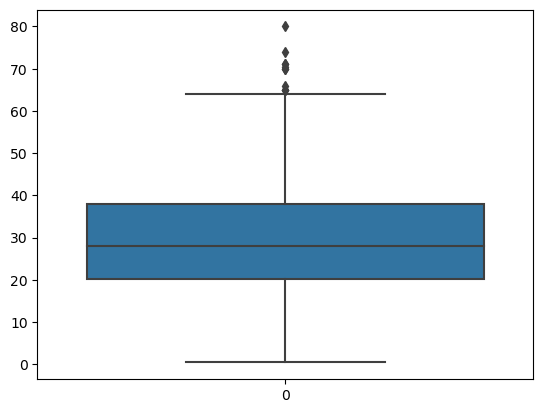

In [8]:
sns.boxplot(df["Age"])

In [9]:
 # Finding Outliers
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

In [10]:
print("upper_tail =",upper_tail,"lower_tail =",lower_tail)

upper_tail = 64.8125 lower_tail = -6.6875


# Feature Engineering

In [11]:
df["Parch"].unique()
df.drop("Parch",axis=1, inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [13]:
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,8,30.0000,60,0


In [14]:
# Handling outliers
def handling_outliers(df_handle,columns):
    for column in columns:
        q1 = df_handle[column].quantile(0.25)
        q3 = df_handle[column].quantile(0.75)
        iqr = q3 - q1
        lower_tail1 = q1 - 1.5 * iqr
        upper_tail1 = q3 + 1.5 * iqr
        print(lower_tail1)
        print(upper_tail1)
        df_handle[column]= df_handle[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns=['PassengerId', 'Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Fare','Name','Cabin','Ticket']
handling_outliers(df,columns)

-444.0
1336.0
-1.5
2.5
0.5
4.5
-1.5
2.5
-6.6875
64.8125
-1.5
2.5
-26.724
65.6344
-445.0
1335.0
147.0
147.0
-383.0
1061.0


In [15]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

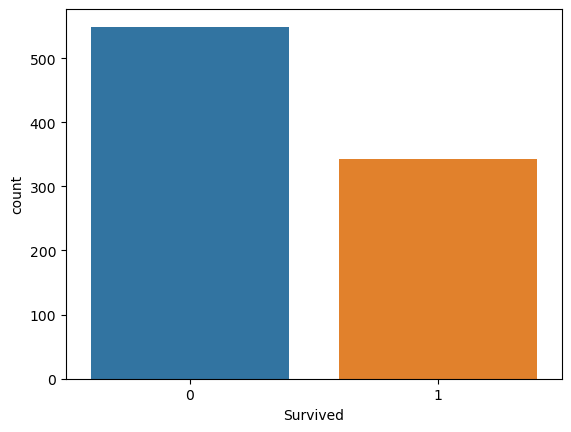

In [17]:
sns.countplot(x=df["Survived"])

# Feature Selection

In [18]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.032055,-0.072778,-0.056554,0.003243,NaN,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069575,0.031434,-0.164549,0.317430,NaN,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.332946,0.023180,0.319869,-0.715300,NaN,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.060566,-0.066940,0.047348,-0.062697,NaN,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081728,-0.167885,0.059372,-0.234969,NaN,0.104057
Age,0.032055,-0.069575,-0.332946,0.060566,0.081728,1.000000,-0.247526,-0.072097,0.139195,NaN,-0.021556
SibSp,-0.072778,0.031434,0.023180,-0.066940,-0.167885,-0.247526,1.000000,0.032401,0.349615,NaN,0.036526
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.072097,0.032401,1.000000,-0.140403,NaN,-0.006041
Fare,0.003243,0.317430,-0.715300,-0.062697,-0.234969,0.139195,0.349615,-0.140403,1.000000,NaN,-0.193396
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

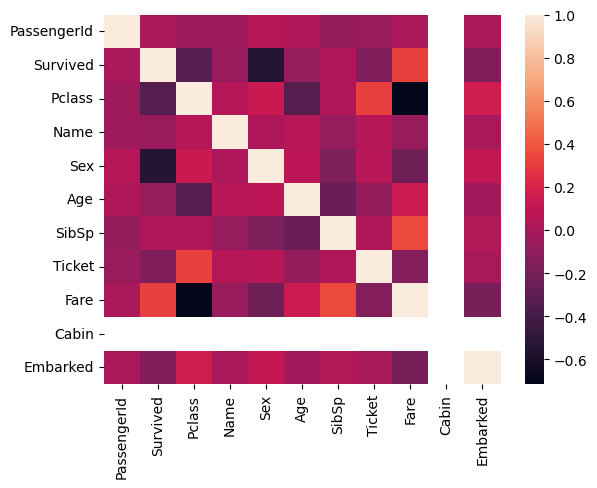

In [19]:
sns.heatmap(df.corr())

# Model training

In [20]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_array = std.fit_transform(df.iloc[:,:11])
df2 = pd.DataFrame(std_array)
df2

,0,1,2,3,4,5,6,7,8,9,10
0,-1.730108,-0.789272,0.827377,-1.310217,0.737695,-5.951974e-01,0.810220,0.918966,-0.820552,0.0,0.581114
1,-1.726220,1.266990,-1.566107,-0.991410,-1.355574,6.541183e-01,0.810220,1.282625,2.031623,0.0,-1.938460
2,-1.722332,1.266990,0.827377,-0.357685,-1.355574,-2.828685e-01,-0.602512,1.646283,-0.787578,0.0,0.581114
3,-1.718444,1.266990,-1.566107,-0.672604,-1.355574,4.198716e-01,0.810220,-1.442322,1.419297,0.0,0.581114
4,-1.714556,-0.789272,0.827377,-1.671790,0.737695,4.198716e-01,-0.602512,0.664904,-0.781471,0.0,0.581114
...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,0.400452,0.737695,-2.047862e-01,-0.602512,-1.183277,-0.539655,0.0,0.581114
887,1.718444,1.266990,-1.566107,-0.552079,-1.355574,-8.294441e-01,-0.602512,-1.616678,0.290823,0.0,0.581114
888,1.722332,-0.789272,0.827377,-0.124412,-1.355574,2.774038e-16,0.810220,1.676173,-0.029155,0.0,0.581114
889,1.726220,1.266990,-1.566107,-1.415189,0.737695,-2.828685e-01,-0.602512,-1.646568,0.290823,0.0,-1.938460


In [21]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

In [22]:
 xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)

# Model Evaluation

In [23]:
reg1 = LogisticRegression(multi_class="ovr")  
reg1.fit(xtrain,ytrain)

LogisticRegression(multi_class='ovr')

In [24]:
reg_model1 = reg1.fit(xtrain,ytrain)
reg_model1

LogisticRegression(multi_class='ovr')

In [25]:
ytrain_pred = reg_model1.predict(xtrain)
ytrain_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [26]:
#training
accuracy = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {accuracy}")
multi_confusion_matrix = multilabel_confusion_matrix(ytrain,ytrain_pred)
print(multi_confusion_matrix)
class_report = classification_report(ytrain,ytrain_pred)
print(class_report)

Accuracy : 0.7913322632423756
[[[166  73]
  [ 57 327]]

 [[327  57]
  [ 73 166]]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       384
           1       0.74      0.69      0.72       239

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.78       623
weighted avg       0.79      0.79      0.79       623



In [27]:
ytest_pred =reg_model1.predict(xtest)
ytest_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1], dtype=int64)

In [28]:
#testing
accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {accuracy}")
multi_conf_matrix = multilabel_confusion_matrix(ytest,ytest_pred)
print(multi_conf_matrix)
print(classification_report(ytest,ytest_pred))

Accuracy : 0.835820895522388
[[[ 76  27]
  [ 17 148]]

 [[148  17]
  [ 27  76]]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       165
           1       0.82      0.74      0.78       103

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.84      0.83       268



# Decision tree

In [29]:
dec_tree = DecisionTreeClassifier()
dec_tree_model = dec_tree.fit(xtrain,ytrain)
dec_tree_model

DecisionTreeClassifier()

In [30]:
ytrain_pred = dec_tree_model.predict(xtrain)
ytrain_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [31]:
accuracy_training = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy = {accuracy_training}")

Training_classification_report = classification_report(ytrain,ytrain_pred)
print(f"classification_report = {Training_classification_report}")

Training_confusion_matrix = multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"confusion_matrix = {Training_confusion_matrix}")

Accuracy = 1.0
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       239

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623

confusion_matrix = [[[239   0]
  [  0 384]]

 [[384   0]
  [  0 239]]]


In [32]:
ytest_pred = dec_tree_model.predict(xtest)

In [33]:
accuracy_testing = accuracy_score(ytest,ytest_pred)
print(f"Accuracy = {accuracy_testing}")

Testing_classification_report = classification_report(ytest,ytest_pred)
print(f"classification_report = {Testing_classification_report}")

Testing_confusion_matrix = multilabel_confusion_matrix(ytest,ytest_pred)
print(f"confusion_matrix = {Testing_confusion_matrix}")

Accuracy = 0.746268656716418
classification_report =               precision    recall  f1-score   support

           0       0.79      0.80      0.80       165
           1       0.67      0.66      0.67       103

    accuracy                           0.75       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.75      0.75      0.75       268

confusion_matrix = [[[ 68  35]
  [ 33 132]]

 [[132  33]
  [ 35  68]]]


### Decision Tree Hyperparameter Tunning

In [34]:
Hyper_Decision = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(2,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,20),
} 

In [35]:
Random_search = RandomizedSearchCV(dec_tree_model,Hyper_Decision, cv = 5)

In [36]:
Random_search.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [37]:
Random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       min_samples_split=4)

In [38]:
Decision_hyper_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=17,
                       min_samples_split=20)

In [39]:
Decision_hyper_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=17,
                       min_samples_split=20)

In [40]:
ytrain_pred_hyper = Decision_hyper_model.predict(xtrain)
ytrain_pred_hyper

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [41]:
accuracy_Training_hyper = accuracy_score(ytrain,ytrain_pred_hyper)
print(f"Accuracy = {accuracy_Training_hyper}")

Training_classification_report_hyper = classification_report(ytrain,ytrain_pred_hyper)
print(f"classification_report = {Training_classification_report_hyper}")

Training_confusion_matrix_hyper = multilabel_confusion_matrix(ytrain,ytrain_pred_hyper)
print(f"confusion_matrix = {Training_confusion_matrix_hyper}")

Accuracy = 0.841091492776886
classification_report =               precision    recall  f1-score   support

           0       0.85      0.91      0.88       384
           1       0.83      0.74      0.78       239

    accuracy                           0.84       623
   macro avg       0.84      0.82      0.83       623
weighted avg       0.84      0.84      0.84       623

confusion_matrix = [[[176  63]
  [ 36 348]]

 [[348  36]
  [ 63 176]]]


In [42]:
ytest_pred_hyper = Decision_hyper_model.predict(xtest)

In [43]:
accuracy_Testing_hyper = accuracy_score(ytest,ytest_pred_hyper)
print(f"Accuracy = {accuracy_Testing_hyper}")

Testing_classification_hyper = classification_report(ytest,ytest_pred_hyper)
print(f"classification_report = {Testing_classification_hyper}")

Testing_confusion__hyper = multilabel_confusion_matrix(ytest,ytest_pred_hyper)
print(f"confusion_matrix = {Testing_confusion__hyper}")

Accuracy = 0.8208955223880597
classification_report =               precision    recall  f1-score   support

           0       0.82      0.92      0.86       165
           1       0.83      0.67      0.74       103

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268

confusion_matrix = [[[ 69  34]
  [ 14 151]]

 [[151  14]
  [ 34  69]]]


# Creating Pickle

In [45]:
with open("titanic.pkl","wb") as f:
    pickle.dump(Decision_hyper_model,f)

In [46]:
class prediction():
    def TITANIC(self,testing_data):
        with open("titanic.pkl","rb") as f:
            model = pickle.load(f)
            prediction=model.predict(testing_data)
            print('prediction=',prediction)
        return prediction

In [47]:
predict=prediction()

In [48]:
testing_data=x.head(8)

In [49]:
predict.TITANIC(testing_data)

prediction= [0 1 0 1 0 0 0 0]


array([0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)